In [56]:
import pandas as pd
import numpy as np

data = pd.read_csv('Multi_30.txt', skiprows = 29,sep='\t')
 
data.columns = ['Timestamp', 'Channel A', 'Channel B', 'Unnamed']
data_1 = data.drop('Channel B', axis=1)
data_2 = data_1.drop('Unnamed', axis=1)
data_2['Channel A'] = pd.to_numeric(data_2["Channel A"], errors='coerce')
data_3 = data_2.dropna()
import sys
np.set_printoptions(threshold=sys.maxsize)
data_3.to_numpy()

e1 = (data_3.to_numpy()[:, 0] > 30)
e2 = (data_3.to_numpy()[:, 0] < 100)
arr = data_3.to_numpy()[e1 & e2]
print(data_3.to_numpy()[e1 & e2])
#print(data_3.to_numpy())
data_list = arr.tolist()
type(data_list)

[[3.0049e+01 6.0100e-03]
 [3.0145e+01 6.0300e-03]
 [3.0209e+01 6.0300e-03]
 [3.0273e+01 6.0700e-03]
 [3.0337e+01 6.1100e-03]
 [3.0401e+01 6.1200e-03]
 [3.0465e+01 6.1200e-03]
 [3.0529e+01 6.0900e-03]
 [3.0593e+01 6.0800e-03]
 [3.0657e+01 6.1000e-03]
 [3.0721e+01 6.1300e-03]
 [3.0785e+01 6.1200e-03]
 [3.0849e+01 6.0900e-03]
 [3.0945e+01 6.1000e-03]
 [3.1009e+01 6.0800e-03]
 [3.1073e+01 6.1100e-03]
 [3.1137e+01 6.1200e-03]
 [3.1201e+01 6.1000e-03]
 [3.1264e+01 6.0800e-03]
 [3.1328e+01 6.1000e-03]
 [3.1393e+01 6.0700e-03]
 [3.1457e+01 6.1200e-03]
 [3.1521e+01 6.0500e-03]
 [3.1585e+01 6.0700e-03]
 [3.1649e+01 6.0600e-03]
 [3.1744e+01 6.0900e-03]
 [3.1809e+01 5.9900e-03]
 [3.1873e+01 6.0400e-03]
 [3.1937e+01 6.0200e-03]
 [3.2001e+01 5.9800e-03]
 [3.2065e+01 5.9200e-03]
 [3.2128e+01 5.9200e-03]
 [3.2193e+01 5.9800e-03]
 [3.2257e+01 5.9100e-03]
 [3.2321e+01 5.9500e-03]
 [3.2385e+01 5.9500e-03]
 [3.2448e+01 5.9600e-03]
 [3.2513e+01 5.9300e-03]
 [3.2608e+01 5.9200e-03]
 [3.2673e+01 5.9200e-03]


list

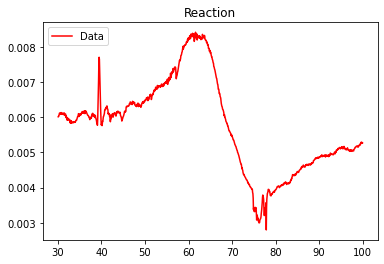

0.00841
The x-value with maximum y-value is : 7.944444444444445


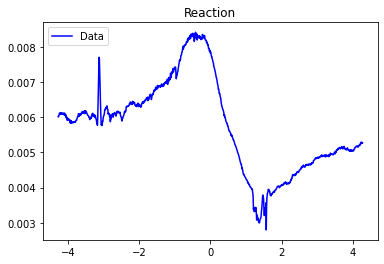

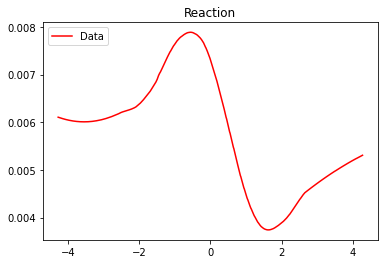

In [57]:
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
xi = arr[:,0]
x = arr[:,0]
y = arr[:,1]
yfi = savgol_filter(y, 401, 2) # window size 51, polynomial order 3

plt.plot(xi,y,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

a = max(y)
print(a)
# Python3 code to demonstrate 
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
# using max() + itemgetter()
# to get tuple info. of maximum value tuple
toc = 9/1.1
res = 65
# printing result
print ("The x-value with maximum y-value is : " + str(res/toc))

plt.plot((x-res)/toc,y,'-b') 
#toc - time for moving translation stage by 1cm. 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

plt.plot(((x-res)/toc),yfi,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the function
def Closed(x,c,e,d):
    return c*(1  + (4*e*x/((x**2 + 9)*(x**2 + 1))) - (d/(1 + x**2)))
popt, pcov = curve_fit(Closed, (x-res)/toc, yfi)

In [59]:
from pylab import *
fit_c = popt[0]
fit_e = popt[1]
fit_d = popt[2]
err_c = sqrt(pcov[0][0])
err_e = sqrt(pcov[1][1])
err_d = sqrt(pcov[2][2])
print("The best fit for c is: " + str(fit_c))
print("The best fit for d is: " + str(fit_d))
print("The best fit for e is: " + str(fit_e))
print("The error for c is: " + str(err_c))
print("The error for d is: " + str(err_d))
print("The error for e is: " + str(err_e))

The best fit for c is: 0.005105912946767062
The best fit for d is: -0.4027952140159011
The best fit for e is: -1.619962685831468
The error for c is: 1.535964887219717e-05
The error for d is: 0.007969338478087043
The error for e is: 0.017370664095955814


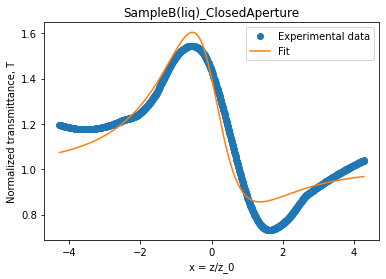

In [60]:
fit_y = Closed((x-res)/toc, fit_c, fit_e, fit_d)
plt.title('SampleB(liq)_ClosedAperture') 
plt.xlabel('x = z/z_0')
plt.ylabel('Normalized transmittance, T')
plt.plot((x-res)/toc, yfi/fit_c, 'o', label='Experimental data')
plt.plot((x-res)/toc, fit_y/fit_c, '-', label='Fit')
plt.legend()